# Posthoc Analysis of IMAGEN:
The preliminary results in our IMAGEN paper advocates for a more in-depth understanding of what contributes to the significant performance of the ML models for the three time-points: <br>
<li>Baseline (<b>BL</b>): Age <tr> <b>14</b></li>
<li>Follow 1 year (<b>FU1</b>): Age <b>16</b></li>
<li>Follow 2 year (<b>FU2</b>): Age <b>19</b></li>
<li>Follow 3 year (<b>FU3</b>): Age <b>22</b></li>

<br>
Such in-depth understanding can be achieved by performing follow-up analysis:

In [1]:
from imagen_shap_visualization import *

# 4. Visualization SHAP
## 4.1. SHAP values

### 4.1.1. Get the data

In [ ]:
# get_data

In [ ]:
# load the training data

In [2]:
# load the holdout data
h5_dir = "/ritter/share/data/IMAGEN/h5files/newholdout-fu3-espad-fu3-19a-binge-n102.h5"
data = h5py.File(h5_dir, 'r')
data.keys(), data.attrs.keys()

X = data['X'][()]
# y = data[data.attrs['labels'][0]][:4]
X_col_names = data.attrs['X_col_names']
X.shape, len(X_col_names)

((102, 723), 723)

### 4.1.2. Get the shap value

In [ ]:
# get_shap_value

In [ ]:
# multiprocessing suggestion

In [3]:
MODEL = ["SVM-RBF"]

In [ ]:
to_shap(MODEL, X)

### 4.1.3. Get the plot

In [ ]:
# get_plot

<b> Load the dataset </b>

In [4]:
with open('explainers/SVM-rbf0_holdout_shap.sav', 'rb') as fp:
    load_shap_values = pickle.load(fp)
if not os.path.isdir("figures"):
    os.makedirs("figures")

<b> ROI 01: summary bar plot of feature importnace </b>

skipping model GB
skipping model LR
skipping model SVM-lin
generating SHAP values for model = SVM-rbf ..
Skipping model 'SVM-rbf': 1' as it is taking too long
Skipping model 'SVM-rbf': 2' as it is taking too long
Skipping model 'SVM-rbf': 3' as it is taking too long
Skipping model 'SVM-rbf': 4' as it is taking too long
Skipping model 'SVM-rbf': 5' as it is taking too long
Skipping model 'SVM-rbf': 6' as it is taking too long


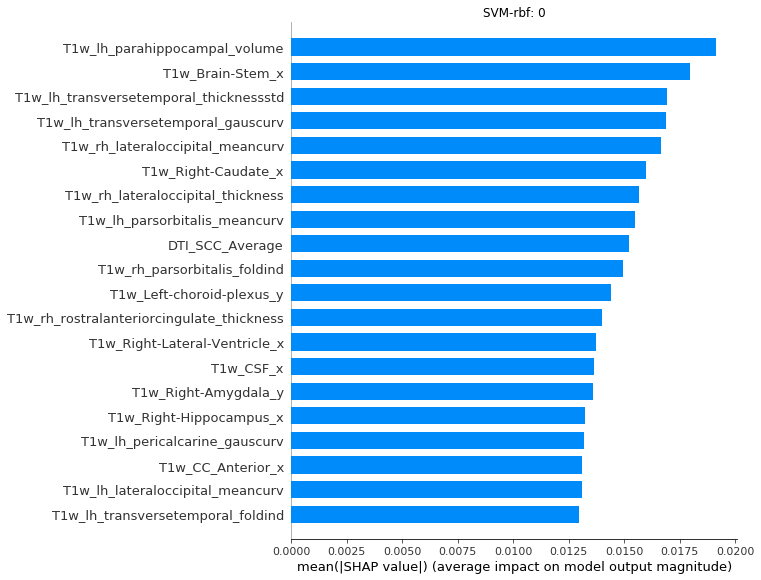

In [5]:
for model_name in models:
    if ( model_name.upper() not in MODEL):
        print("skipping model {}".format(model_name))
        continue
    print("generating SHAP values for model = {} ..".format(model_name))
    for i, model in enumerate(models[model_name]):
        if i!=0:
            print("Skipping model '{}': {}' as it is taking too long".format(model_name, i))
            continue
        if i==0:
            # 1. summary bar plot of feature importnace
            shap.summary_plot(load_shap_values, features=X, feature_names=X_col_names, plot_type="bar", show=False)
            plt.title(model_name+": "+str(i))
            plt.savefig(f"figures/{model_name}{i}_holdout_bar.pdf", bbox_inches='tight')

<b> ROI 02: swarm plot showing shap values vs feature values ordered by feature importance </b>

skipping model GB
skipping model LR
skipping model SVM-lin
generating SHAP values for model = SVM-rbf ..
Skipping model 'SVM-rbf': 1' as it is taking too long
Skipping model 'SVM-rbf': 2' as it is taking too long
Skipping model 'SVM-rbf': 3' as it is taking too long
Skipping model 'SVM-rbf': 4' as it is taking too long
Skipping model 'SVM-rbf': 5' as it is taking too long
Skipping model 'SVM-rbf': 6' as it is taking too long


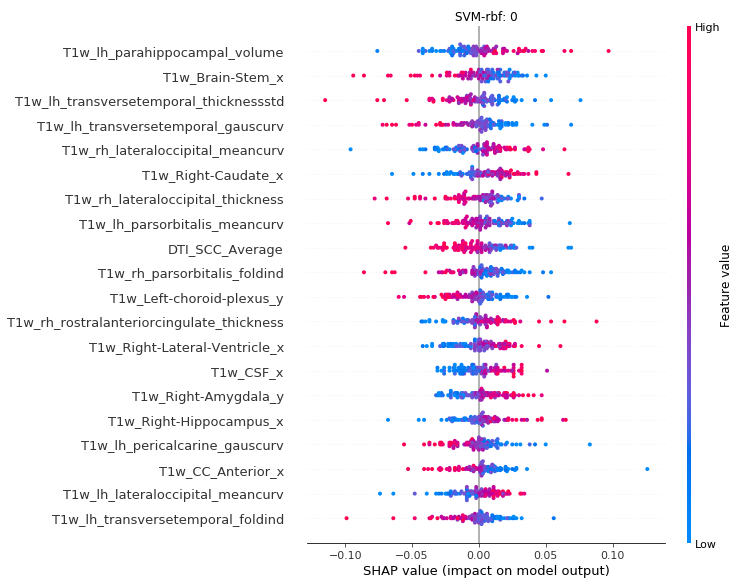

In [6]:
for model_name in models:
    if ( model_name.upper() not in MODEL):
        print("skipping model {}".format(model_name))
        continue
    print("generating SHAP values for model = {} ..".format(model_name))
    for i, model in enumerate(models[model_name]):
        if i!=0:
            print("Skipping model '{}': {}' as it is taking too long".format(model_name, i))
            continue
        if i==0:
            # 2. swarm plot showing shap values vs feature values ordered by feature importance
            shap.summary_plot(load_shap_values, features=X, feature_names=X_col_names, plot_type="dot", show=False)
            plt.title(model_name+": "+str(i))
            plt.savefig(f"figures/{model_name}{i}_holdout_swarm.pdf", bbox_inches='tight')

<b> ROI 03: sex difference plot showing shap values vs feature values ordered by feature importance </b>

In [7]:
sex_mask = data['sex'].astype(bool)[()]

skipping model GB
skipping model LR
skipping model SVM-lin
generating SHAP values for model = SVM-rbf ..
Skipping model 'SVM-rbf': 1' as it is taking too long
Skipping model 'SVM-rbf': 2' as it is taking too long
Skipping model 'SVM-rbf': 3' as it is taking too long
Skipping model 'SVM-rbf': 4' as it is taking too long
Skipping model 'SVM-rbf': 5' as it is taking too long
Skipping model 'SVM-rbf': 6' as it is taking too long


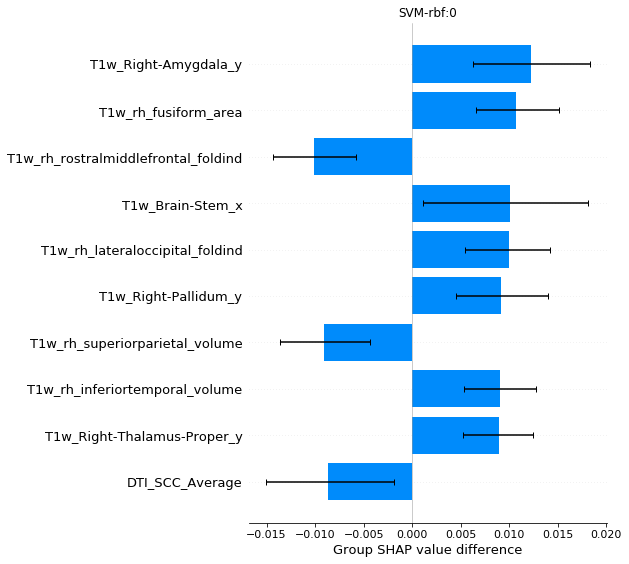

In [8]:
for model_name in models:
    if ( model_name.upper() not in MODEL):
        print("skipping model {}".format(model_name))
        continue
    print("generating SHAP values for model = {} ..".format(model_name))
    for i, model in enumerate(models[model_name]):
        if i!=0:
            print("Skipping model '{}': {}' as it is taking too long".format(model_name, i))
            continue
        if i==0:
            # 3. sex difference plot
            shap.group_difference_plot(load_shap_values.values, group_mask=sex_mask, feature_names=X_col_names, show=False, max_display=10)
            plt.title(model_name+":"+str(i))
            # plt.savefig("figrues/{}_bar-sexdiff.pdf".format(model_name+str(i)), bbox_inches='tight')
            plt.savefig(f"figures/{model_name}{i}_holdout_bar-sexdiff.pdf", bbox_inches='tight')

<b> ROI 03: class difference plot showing shap values vs feature values ordered by feature importance </b>

In [9]:
class_mask = data['Binge'][()].astype(bool)

skipping model GB
skipping model LR
skipping model SVM-lin
generating SHAP values for model = SVM-rbf ..
Skipping model 'SVM-rbf': 1' as it is taking too long
Skipping model 'SVM-rbf': 2' as it is taking too long
Skipping model 'SVM-rbf': 3' as it is taking too long
Skipping model 'SVM-rbf': 4' as it is taking too long
Skipping model 'SVM-rbf': 5' as it is taking too long
Skipping model 'SVM-rbf': 6' as it is taking too long


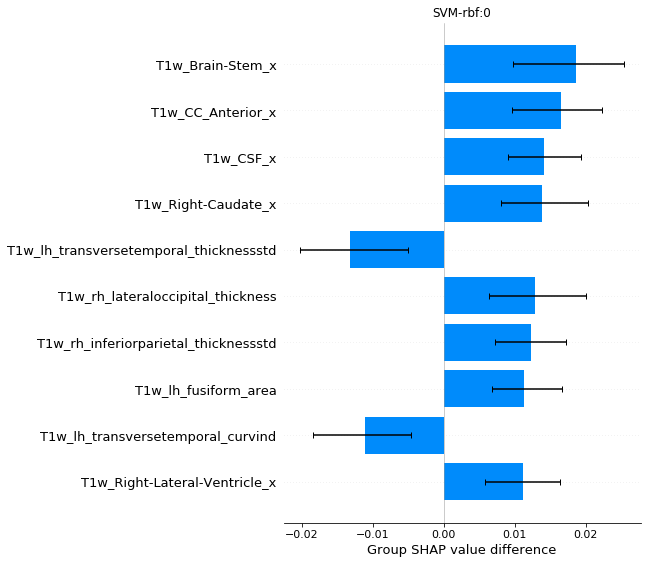

In [10]:
for model_name in models:
    if ( model_name.upper() not in MODEL):
        print("skipping model {}".format(model_name))
        continue
    print("generating SHAP values for model = {} ..".format(model_name))
    for i, model in enumerate(models[model_name]):
        if i!=0:
            print("Skipping model '{}': {}' as it is taking too long".format(model_name, i))
            continue
        if i==0:
            # 3. sex difference plot
            shap.group_difference_plot(load_shap_values.values, group_mask=class_mask, feature_names=X_col_names, show=False, max_display=10)
            plt.title(model_name+":"+str(i))
            # plt.savefig("figrues/{}_bar-sexdiff.pdf".format(model_name+str(i)), bbox_inches='tight')
            plt.savefig(f"figures/{model_name}{i}_holdout_bar-classdiff.pdf", bbox_inches='tight')

In [11]:
with open('explainers/SVM-rbf1_holdout_shap.sav', 'rb') as fp:
    load_shap_values = pickle.load(fp)
if not os.path.isdir("figures"):
    os.makedirs("figures")

skipping model GB
skipping model LR
skipping model SVM-lin
generating SHAP values for model = SVM-rbf ..
Skipping model 'SVM-rbf': 0' as it is taking too long
Skipping model 'SVM-rbf': 2' as it is taking too long
Skipping model 'SVM-rbf': 3' as it is taking too long
Skipping model 'SVM-rbf': 4' as it is taking too long
Skipping model 'SVM-rbf': 5' as it is taking too long
Skipping model 'SVM-rbf': 6' as it is taking too long


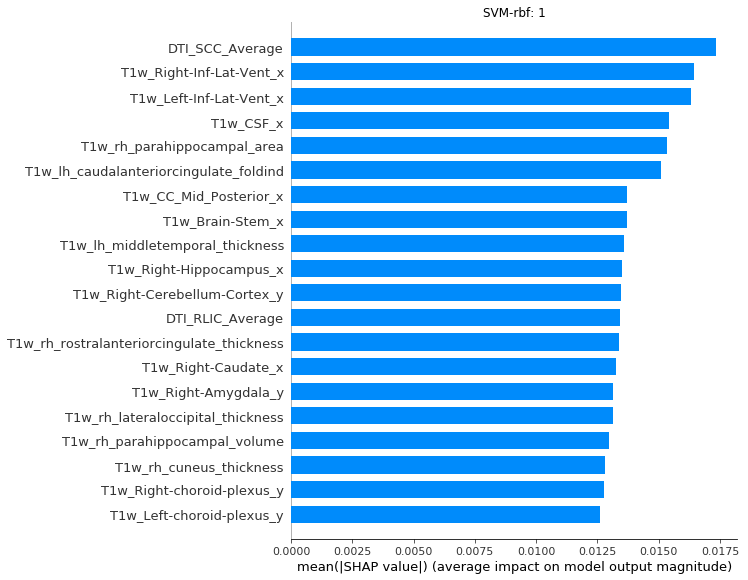

In [12]:
for model_name in models:
    if ( model_name.upper() not in MODEL):
        print("skipping model {}".format(model_name))
        continue
    print("generating SHAP values for model = {} ..".format(model_name))
    for i, model in enumerate(models[model_name]):
        if i!=1:
            print("Skipping model '{}': {}' as it is taking too long".format(model_name, i))
            continue
        if i==1:
            # 1. summary bar plot of feature importnace
            shap.summary_plot(load_shap_values, features=X, feature_names=X_col_names, plot_type="bar", show=False)
            plt.title(model_name+": "+str(i))
            plt.savefig(f"figures/{model_name}{i}_holdout_bar.pdf", bbox_inches='tight')

skipping model GB
skipping model LR
skipping model SVM-lin
generating SHAP values for model = SVM-rbf ..
Skipping model 'SVM-rbf': 0' as it is taking too long
Skipping model 'SVM-rbf': 2' as it is taking too long
Skipping model 'SVM-rbf': 3' as it is taking too long
Skipping model 'SVM-rbf': 4' as it is taking too long
Skipping model 'SVM-rbf': 5' as it is taking too long
Skipping model 'SVM-rbf': 6' as it is taking too long


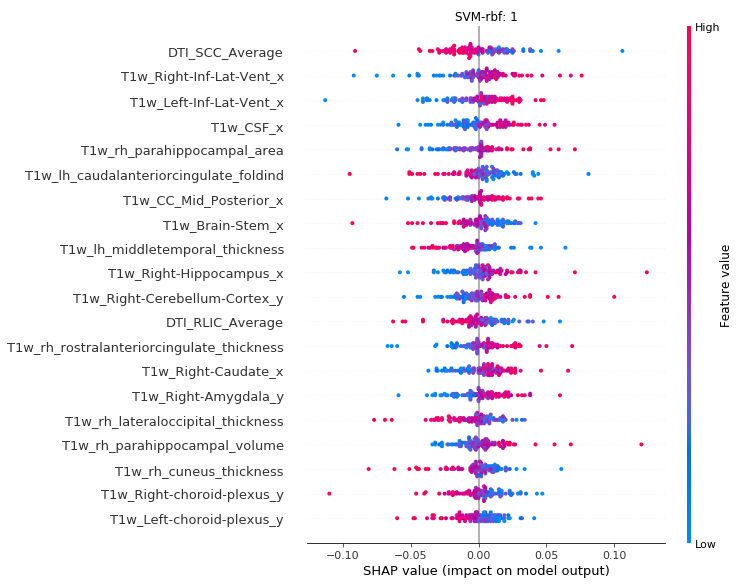

In [13]:
for model_name in models:
    if ( model_name.upper() not in MODEL):
        print("skipping model {}".format(model_name))
        continue
    print("generating SHAP values for model = {} ..".format(model_name))
    for i, model in enumerate(models[model_name]):
        if i!=1:
            print("Skipping model '{}': {}' as it is taking too long".format(model_name, i))
            continue
        if i==1:
            # 2. swarm plot showing shap values vs feature values ordered by feature importance
            shap.summary_plot(load_shap_values, features=X, feature_names=X_col_names, plot_type="dot", show=False)
            plt.title(model_name+": "+str(i))
            plt.savefig(f"figures/{model_name}{i}_holdout_swarm.pdf", bbox_inches='tight')

In [14]:
sex_mask = data['sex'].astype(bool)[()]

skipping model GB
skipping model LR
skipping model SVM-lin
generating SHAP values for model = SVM-rbf ..
Skipping model 'SVM-rbf': 0' as it is taking too long
Skipping model 'SVM-rbf': 2' as it is taking too long
Skipping model 'SVM-rbf': 3' as it is taking too long
Skipping model 'SVM-rbf': 4' as it is taking too long
Skipping model 'SVM-rbf': 5' as it is taking too long
Skipping model 'SVM-rbf': 6' as it is taking too long


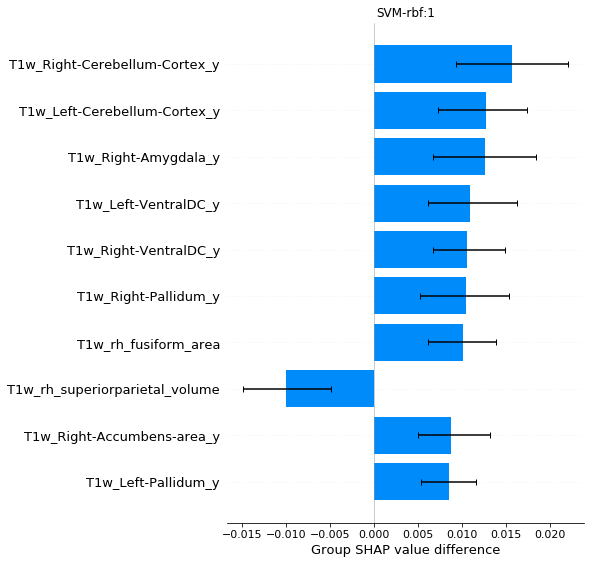

In [15]:
for model_name in models:
    if ( model_name.upper() not in MODEL):
        print("skipping model {}".format(model_name))
        continue
    print("generating SHAP values for model = {} ..".format(model_name))
    for i, model in enumerate(models[model_name]):
        if i!=1:
            print("Skipping model '{}': {}' as it is taking too long".format(model_name, i))
            continue
        if i==1:
            # 3. sex difference plot
            shap.group_difference_plot(load_shap_values.values, group_mask=sex_mask, feature_names=X_col_names, show=False, max_display=10)
            plt.title(model_name+":"+str(i))
            # plt.savefig("figrues/{}_bar-sexdiff.pdf".format(model_name+str(i)), bbox_inches='tight')
            plt.savefig(f"figures/{model_name}{i}_holdout_bar-sexdiff.pdf", bbox_inches='tight')

In [16]:
class_mask = data['Binge'][()].astype(bool)

skipping model GB
skipping model LR
skipping model SVM-lin
generating SHAP values for model = SVM-rbf ..
Skipping model 'SVM-rbf': 0' as it is taking too long
Skipping model 'SVM-rbf': 2' as it is taking too long
Skipping model 'SVM-rbf': 3' as it is taking too long
Skipping model 'SVM-rbf': 4' as it is taking too long
Skipping model 'SVM-rbf': 5' as it is taking too long
Skipping model 'SVM-rbf': 6' as it is taking too long


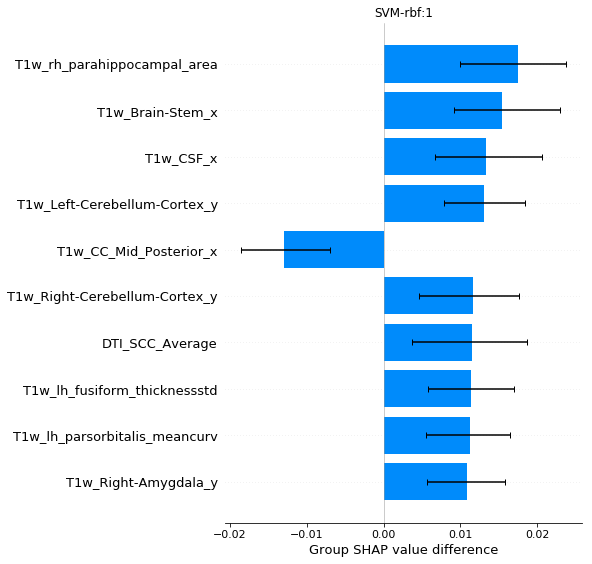

In [17]:
for model_name in models:
    if ( model_name.upper() not in MODEL):
        print("skipping model {}".format(model_name))
        continue
    print("generating SHAP values for model = {} ..".format(model_name))
    for i, model in enumerate(models[model_name]):
        if i!=1:
            print("Skipping model '{}': {}' as it is taking too long".format(model_name, i))
            continue
        if i==1:
            # 3. sex difference plot
            shap.group_difference_plot(load_shap_values.values, group_mask=class_mask, feature_names=X_col_names, show=False, max_display=10)
            plt.title(model_name+":"+str(i))
            # plt.savefig("figrues/{}_bar-sexdiff.pdf".format(model_name+str(i)), bbox_inches='tight')
            plt.savefig(f"figures/{model_name}{i}_holdout_bar-classdiff.pdf", bbox_inches='tight')